# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.shape)
print(data.isna().sum())
# print(data['Movie_Title'].value_counts())
print(data['Movie_Title'].nunique())
data.dtypes

(5391, 6)
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
5318


Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

`.values`
This is an attribute of the resulting Boolean DataFrame/Series.

Purpose: 
- It converts the entire pandas object into its fundamental structure, which is a NumPy array.
- This makes the subsequent operation faster and simpler, as NumPy arrays are designed for efficient mathematical and logical operations.

Output: A NumPy array containing all the True and False values from the `.isna()` step.

In [5]:
data.isna().values.any()


np.False_

In [6]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Checking for Duplicates in the Dataset

The line of code `data.duplicated().values.any()` is used to verify the integrity of the dataset by checking for duplicate rows. Here is a step-by-step breakdown of how it works:

1. **`data.duplicated()`**:
   - This pandas method scans the entire DataFrame.
   - It returns a **Boolean Series** (a list of `True`/`False` values) corresponding to each row.
   - `False` = The row is unique (first occurrence).
   - `True` = The row is a duplicate of a previous row.

2. **`.values`**:
   - This attribute converts the pandas Series into a **NumPy array** of booleans.
   - *Note: This step is technically optional but is often used to strip away index information.*

3. **`.any()`**:
   - This method checks the array for **any** occurrence of `True`.
   - If at least one duplicate exists, it returns `True`.
   - If no duplicates exist, it returns `False`.

---

**Output Interpretation:**
- **`False`**: No duplicates found. The data is clean.
- **`True`**: Duplicates exist. You may need to run `data.drop_duplicates()` to clean the data.

**Cleaner Alternative:**
You can often achieve the same result more cleanly by skipping the conversion to a NumPy array:
```python
data.duplicated().any()

In [7]:
# And check for duplicates with this line:

data.duplicated().values.any()

np.False_

In [8]:
# We can see the total number of duplicates by creating a subset and looking at the length of that subset:

duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
type(data.USD_Production_Budget[0])
data.USD_Production_Budget = data.USD_Production_Budget.str.replace('$','')
data.USD_Production_Budget = data.USD_Production_Budget.str.replace(",","")
data.USD_Production_Budget = data.USD_Production_Budget.str.strip()
data.USD_Production_Budget
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
type(data.USD_Production_Budget[0])

numpy.int64

In [10]:
type(data.USD_Worldwide_Gross[0])
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.str.replace('$','')
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.str.replace(",","")
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.str.strip()
data.USD_Worldwide_Gross
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
type(data.USD_Worldwide_Gross[0])

numpy.int64

In [11]:
type(data.USD_Domestic_Gross[0])
data.USD_Domestic_Gross = data.USD_Domestic_Gross.str.replace('$','')
data.USD_Domestic_Gross = data.USD_Domestic_Gross.str.replace(",","")
data.USD_Domestic_Gross = data.USD_Domestic_Gross.str.strip()
data.USD_Domestic_Gross
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
type(data.USD_Domestic_Gross[0])

numpy.int64

Antoher way to do the above in one go:
```python
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])
```


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [12]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [13]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [14]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [15]:
data.USD_Production_Budget.mean()

np.float64(31113737.57837136)

In [16]:
data.mean(numeric_only=True)

Rank                         2,696.00
USD_Production_Budget   31,113,737.58
USD_Worldwide_Gross     88,855,421.96
USD_Domestic_Gross      41,235,519.44
dtype: float64

In [17]:
data.min(numeric_only=True)

Rank                        1
USD_Production_Budget    1100
USD_Worldwide_Gross         0
USD_Domestic_Gross          0
dtype: int64

In [18]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [19]:
data.loc[ data.USD_Worldwide_Gross.idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [20]:
data[data.USD_Domestic_Gross == 0 ].USD_Domestic_Gross.value_counts()

USD_Domestic_Gross
0    512
Name: count, dtype: int64

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [21]:
len(data[data.USD_Worldwide_Gross == 0 ])

357

In [22]:
count = 0
for index, row in data.iterrows():
    if row.USD_Worldwide_Gross - row.USD_Domestic_Gross <= 0:
        count = count + 1
count

1625

### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [23]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [24]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [25]:
future_releases = data[ data.Release_Date >= scrape_date ]

In [26]:
data_clean = data.drop(future_releases.index)

In [28]:
data_clean.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [30]:
total_movies = len(data_clean)
money_lost = len(data_clean [ data_clean.USD_Worldwide_Gross < data_clean.USD_Production_Budget ])
print(f"{money_lost*100/total_movies} % of movies lost money")

37.27711738484398 % of movies lost money


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

# Seaborn for Data Viz: Bubble Charts

In [31]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



To create a `.scatterplot()`, all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

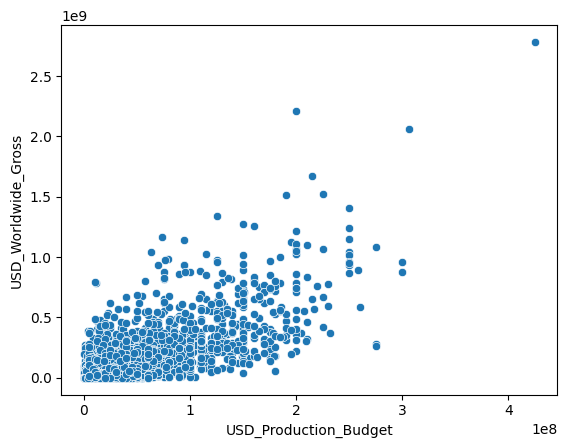

In [33]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

That should look familiar. 😊 Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart. For example, we can increase the size of our figure:

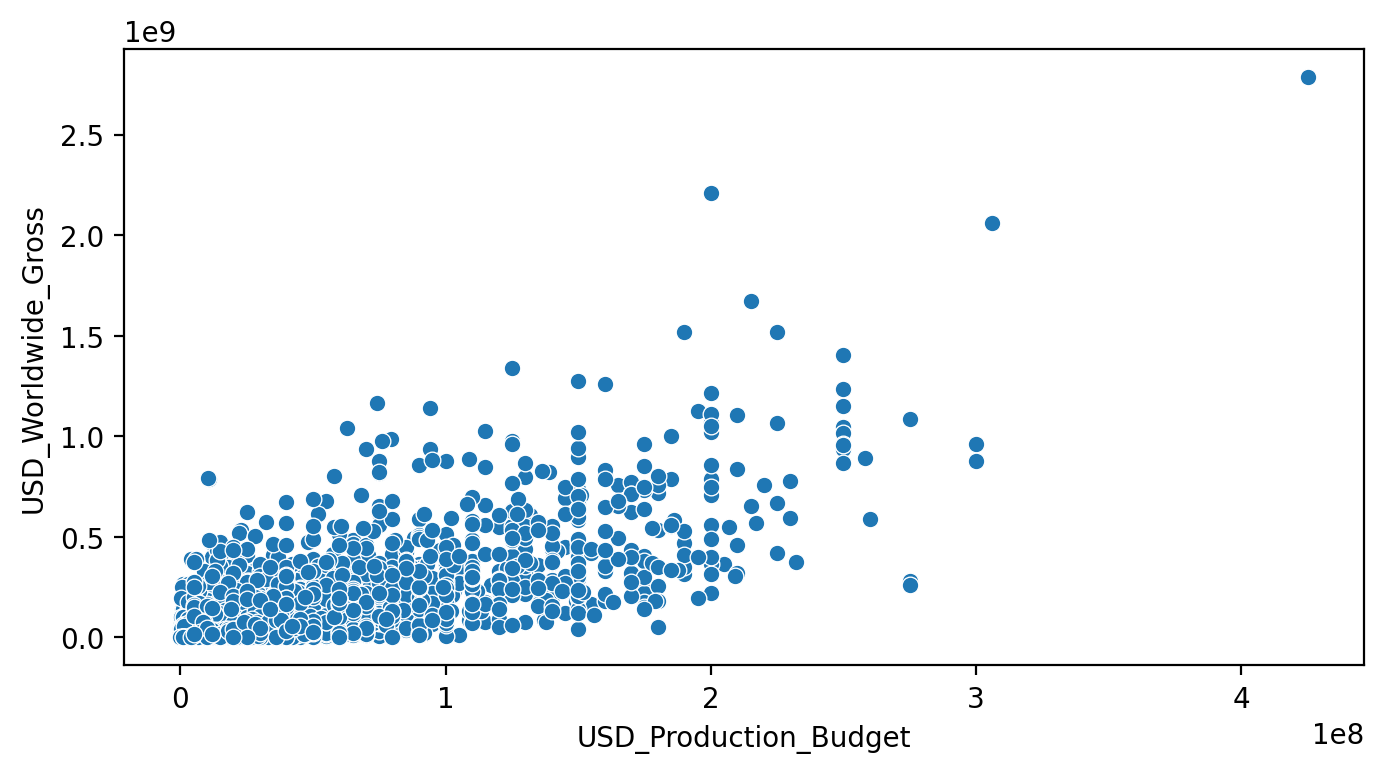

In [34]:
plt.figure(figsize=(8,4),dpi=200)

sns.scatterplot(data=data_clean, x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

plt.show()

And to style our chart we can simply configure the `Axes` object that is returned from `sns.scatterplot()`

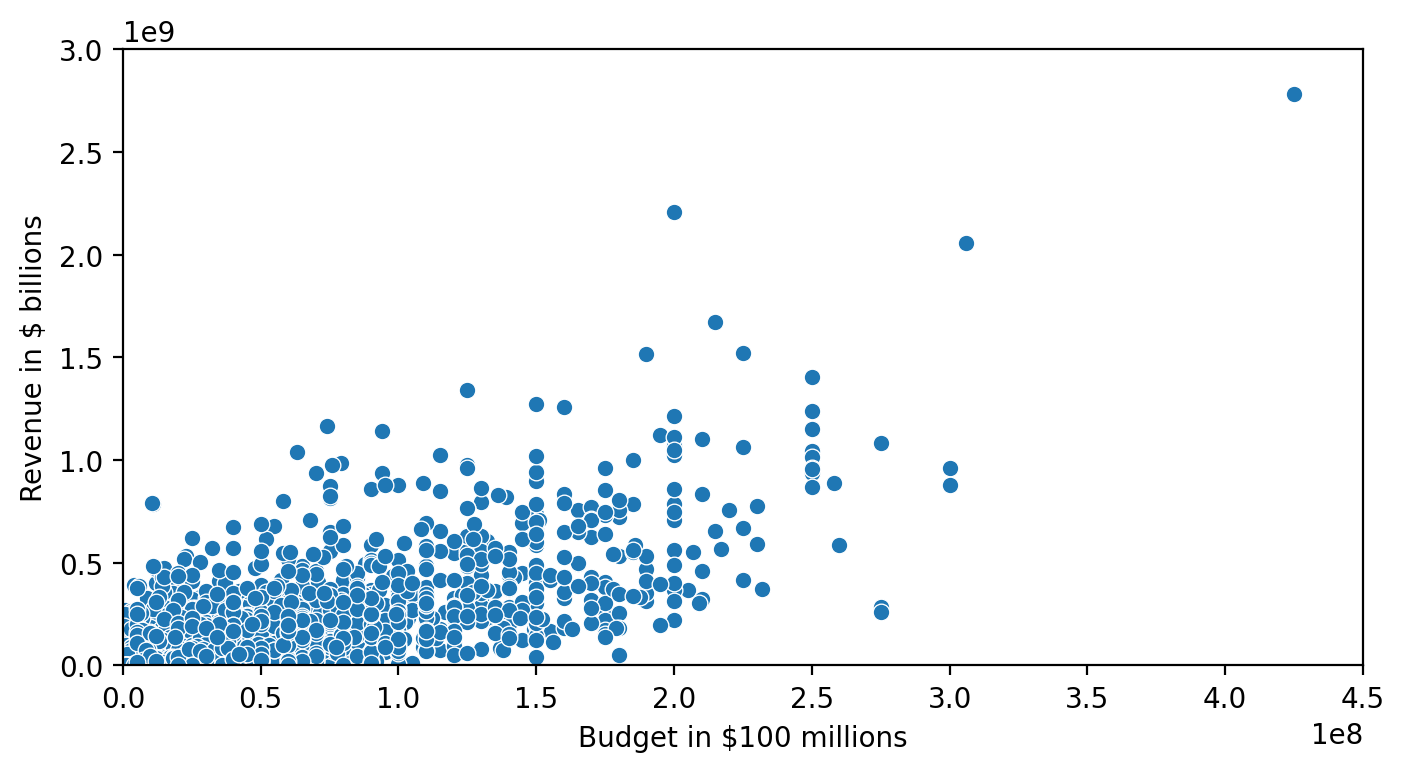

In [35]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

But the reason we're using Seaborn is because of the `hue` and `size` parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

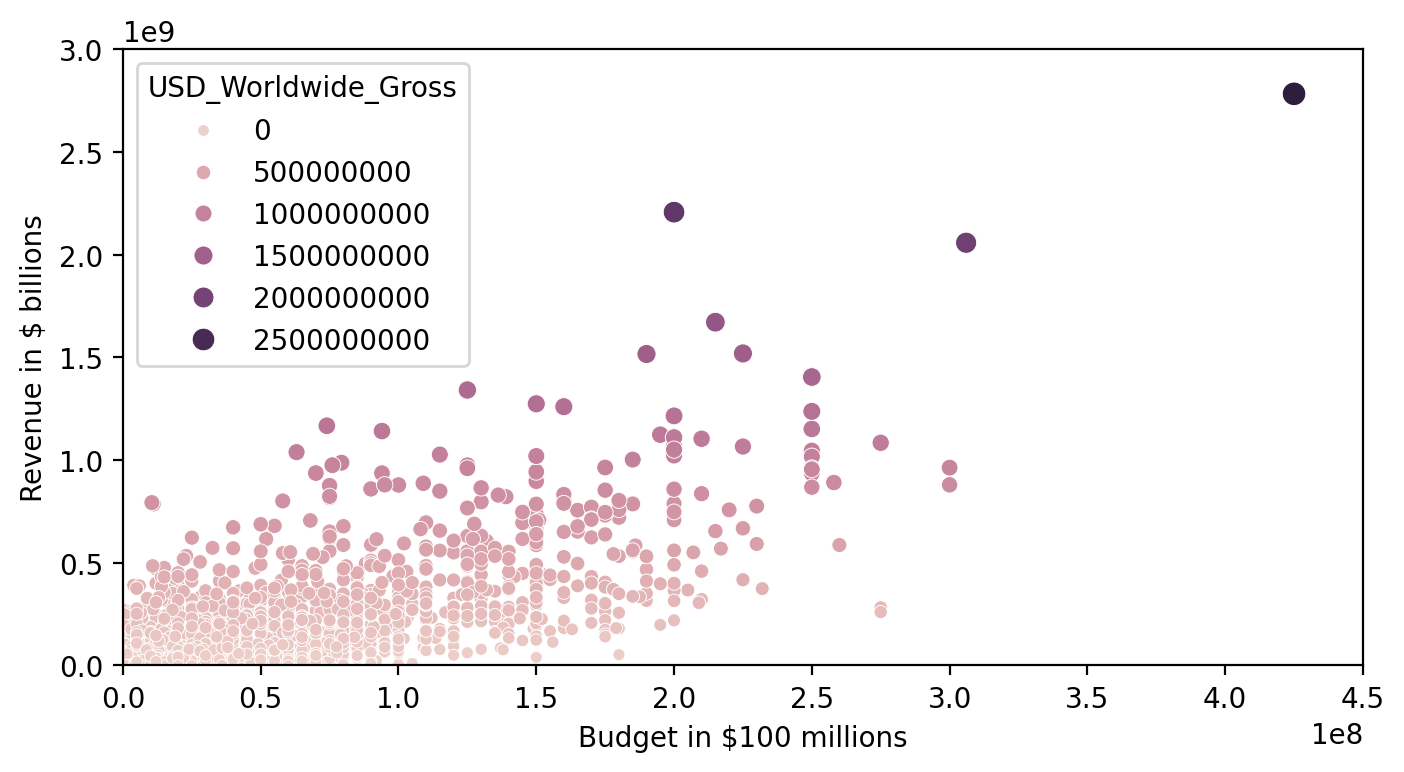

In [36]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's `with` keyword. We've seen `with` used already when it comes to opening files in previous lessons.

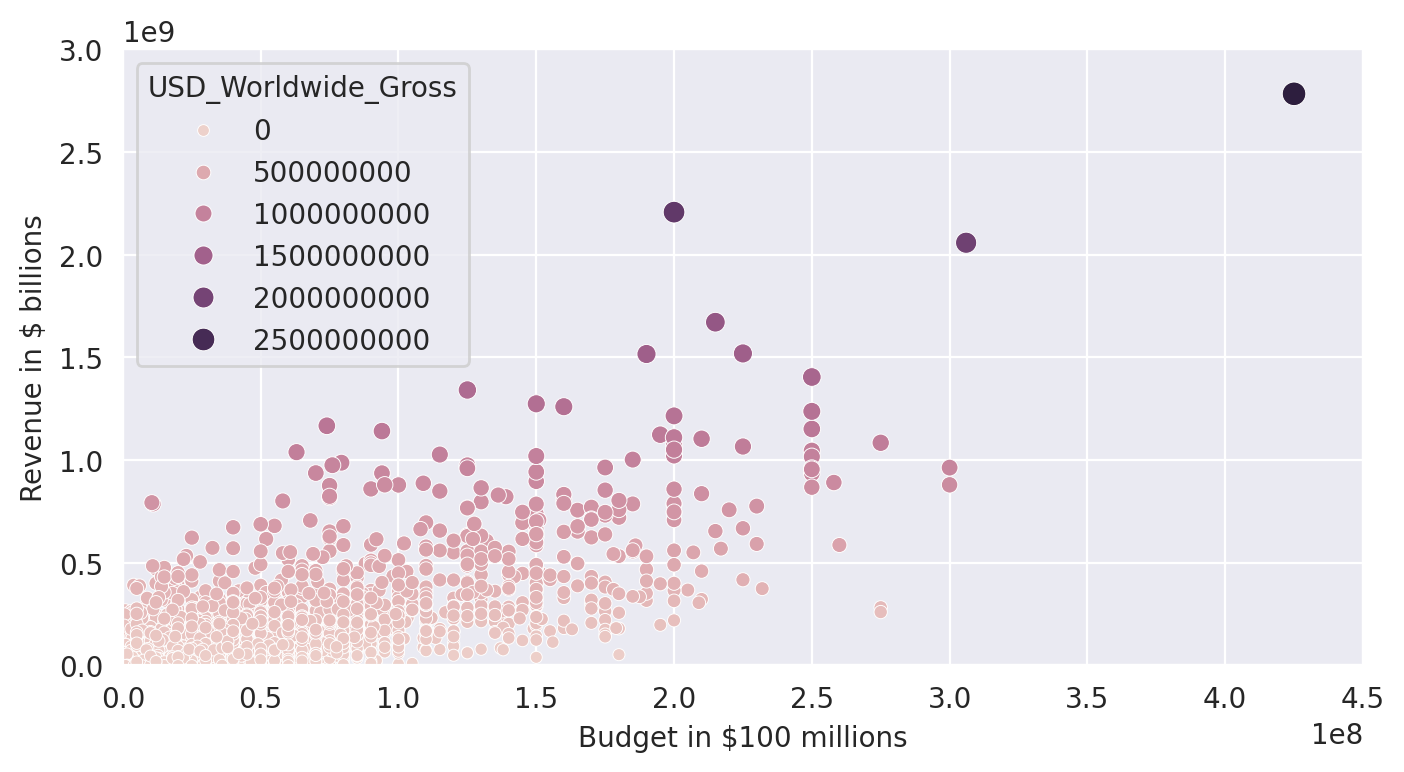

In [37]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

In addition to `'darkgrid'`, Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out `'whitegrid'`, `'dark'`,  or `'ticks'` for example.



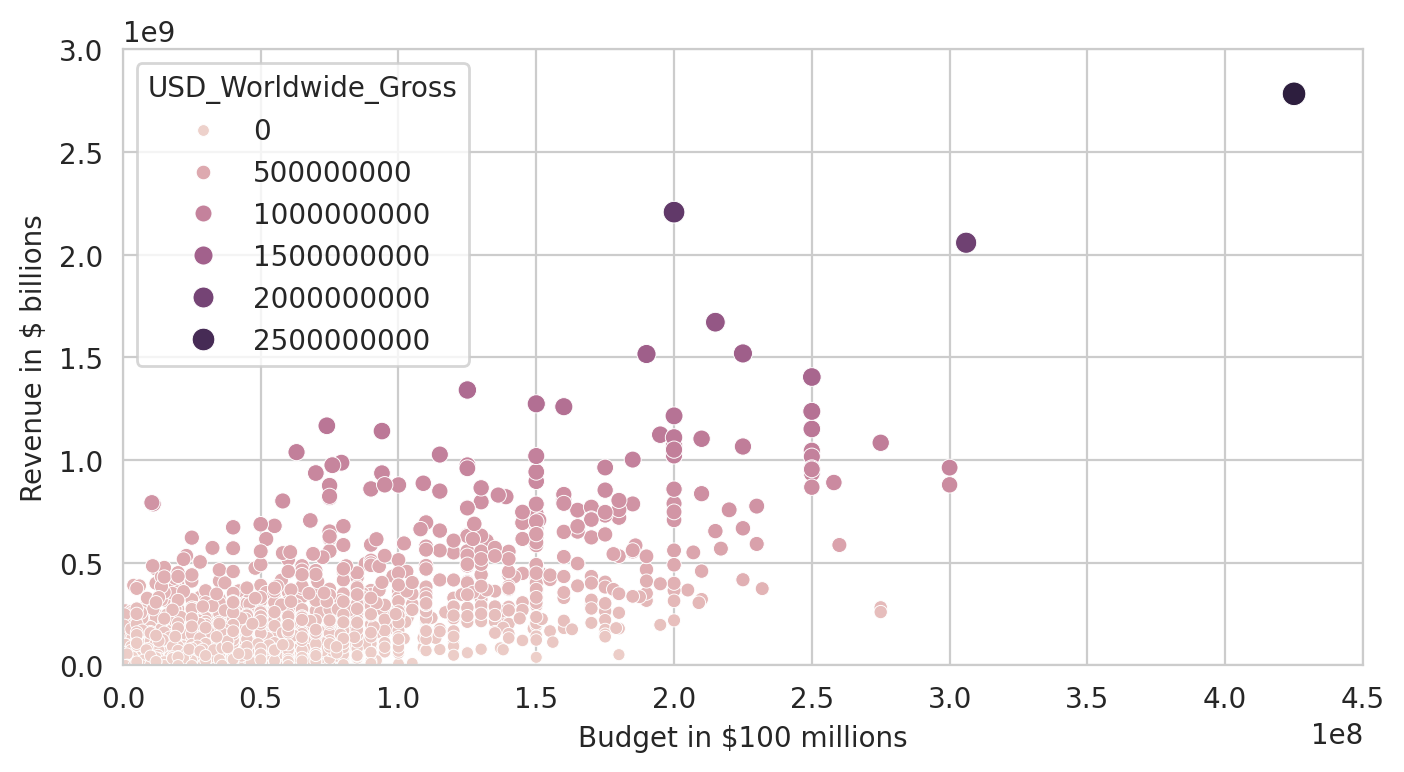

In [38]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('whitegrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

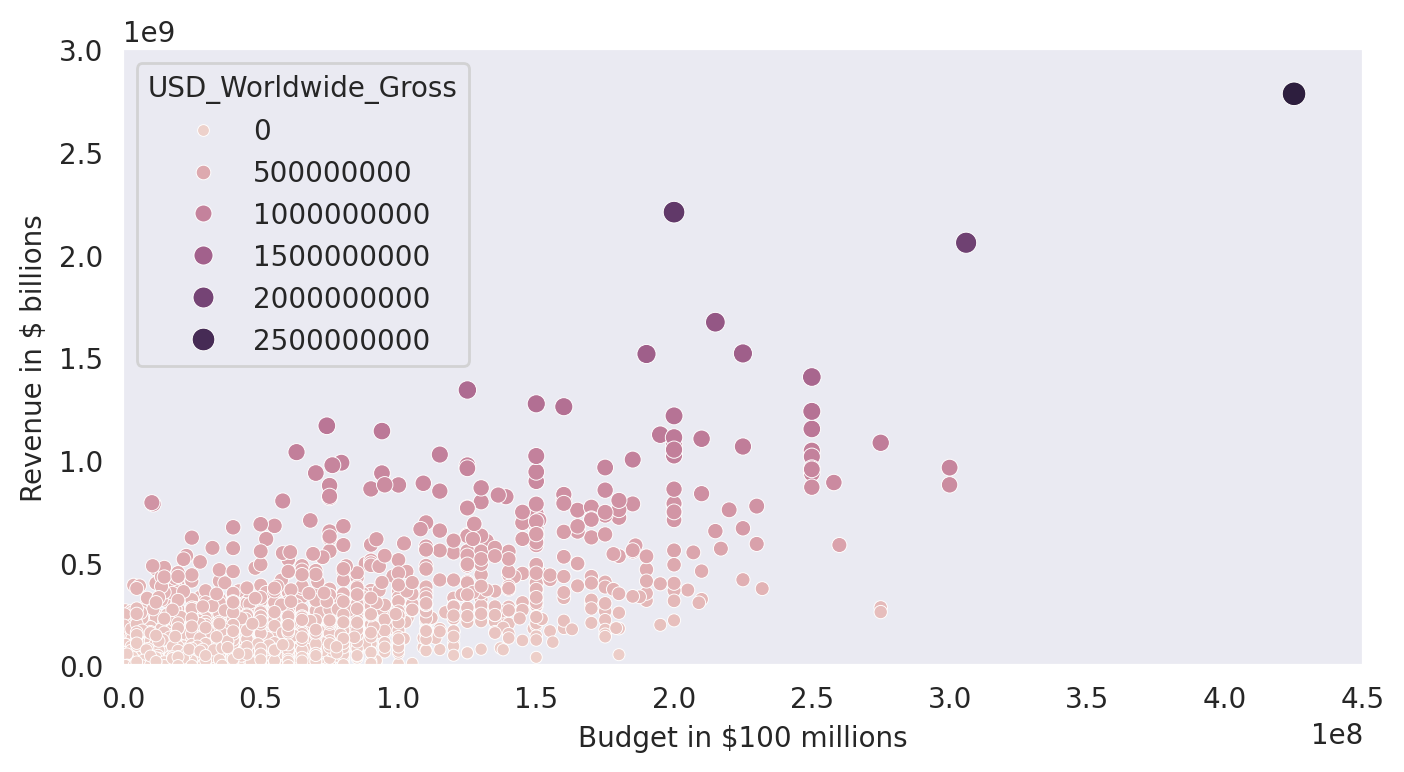

In [39]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('dark'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

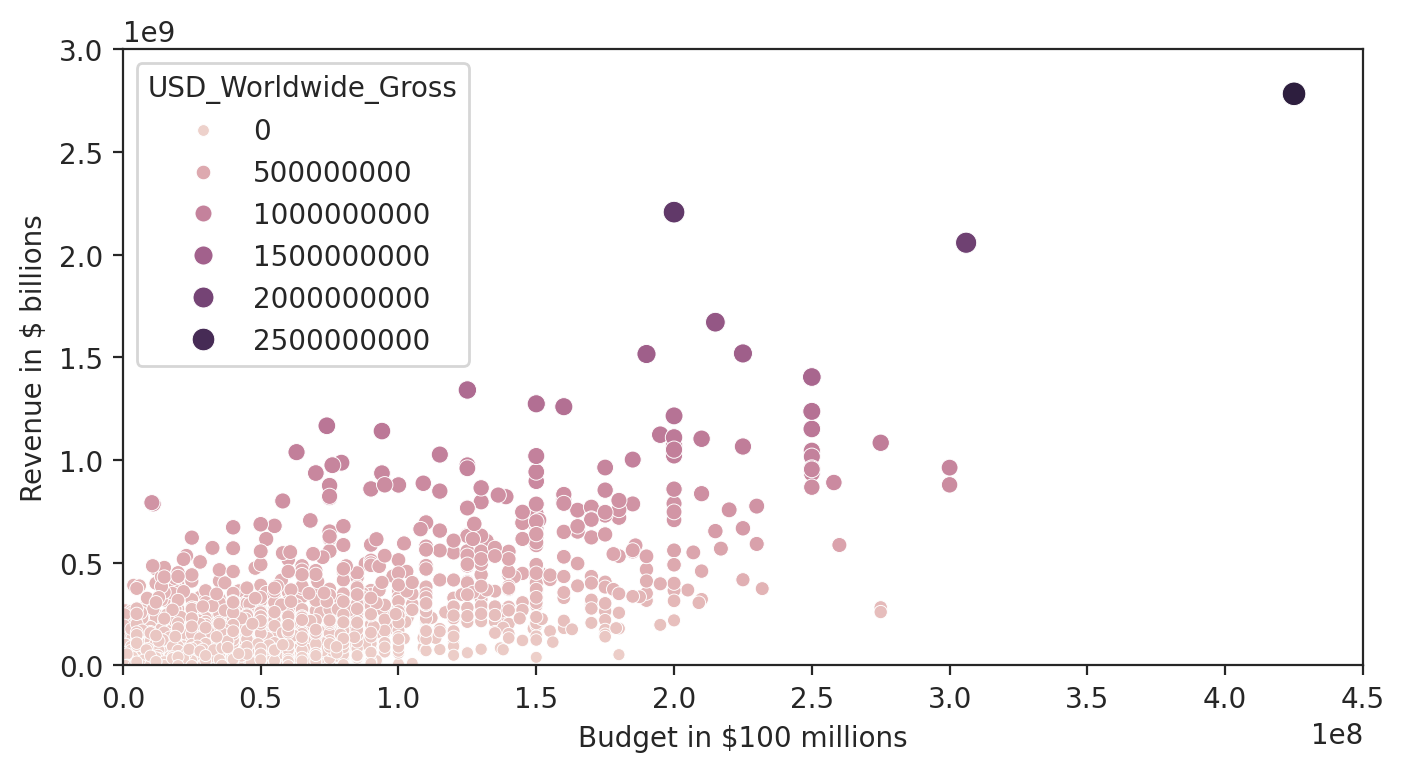

In [40]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('ticks'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

Now that you've seen how to create a beautiful bubble chart in Seaborn, it's time to create your own. Can you write the code to replicate this chart? Notice how we are actually representing THREE dimensions in this chart: the budget, the release date, and the worldwide revenue. This is what makes bubble charts so awesomely informative.
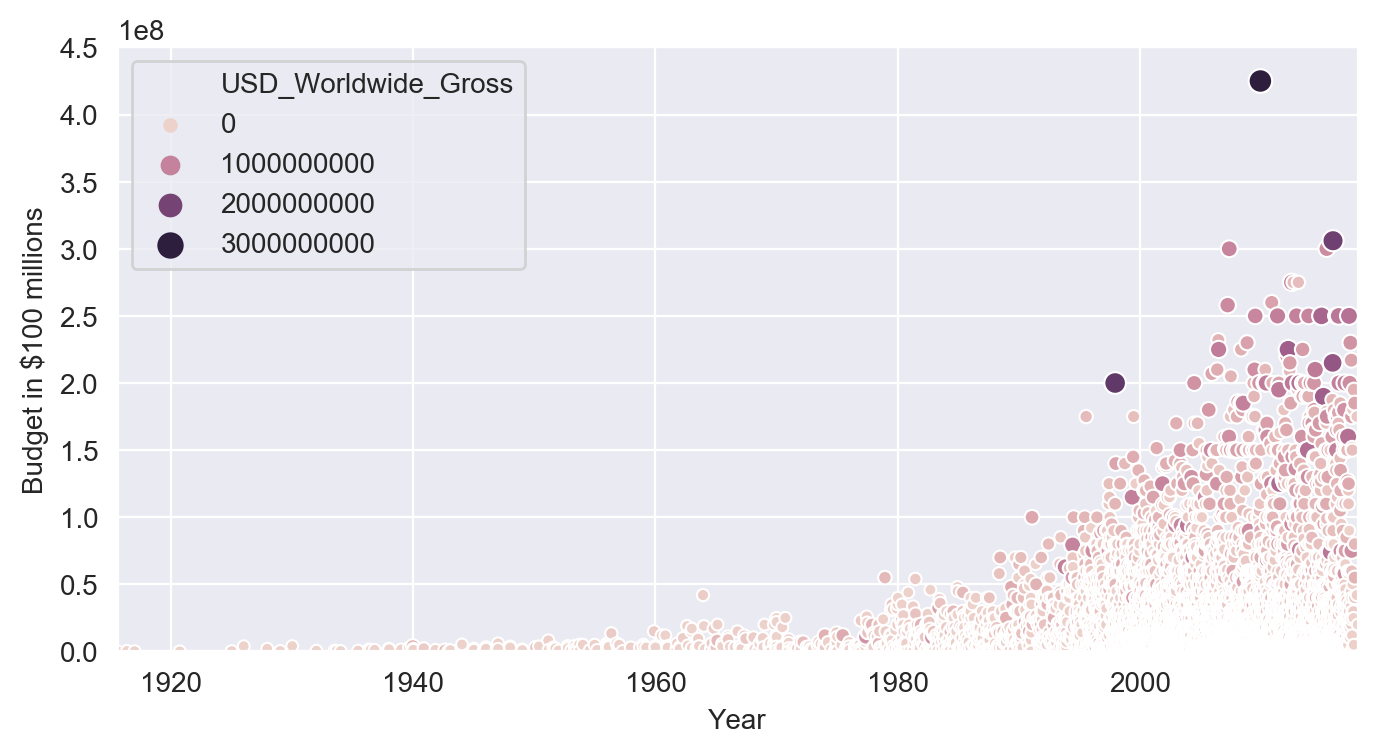

In [41]:
data_clean.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

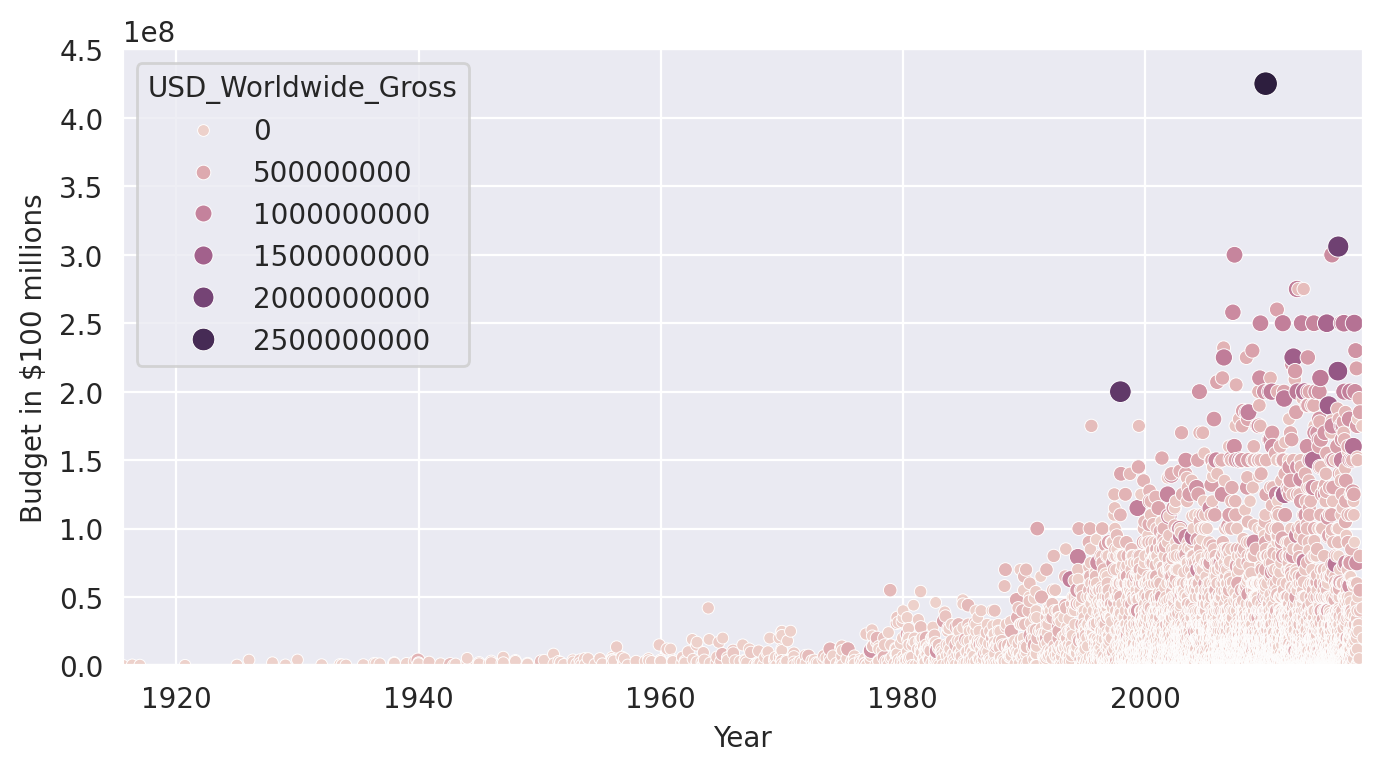

In [49]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [57]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
print(type(dt_index), type(dt_index[0]))
years = dt_index.year

<class 'pandas.core.indexes.datetimes.DatetimeIndex'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [58]:
decades = years//10*10
data_clean['Decade'] = decades

In [59]:
old_films = data_clean.query('Release_Date < 1970')
new_films = data_clean.query('Release_Date >= 1970')
len(old_films)

153

In [60]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [61]:
new_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,231.00",5231,"5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00",2005-02-19 05:27:18.615943424,"31,811,437.73","90,683,497.56","41,841,922.35","2,000.19"
min,1.00,1970-01-01 00:00:00,"1,100.00",0.00,0.00,"1,970.00"
25%,"1,314.50",2000-07-14 00:00:00,"5,000,000.00","3,831,677.00","1,252,581.00","2,000.00"
50%,"2,629.00",2006-10-03 00:00:00,"18,000,000.00","28,544,120.00","17,510,118.00","2,000.00"
75%,"3,967.50",2012-01-06 00:00:00,"40,000,000.00","98,777,000.00","53,301,583.00","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"
std,"1,549.33",NaN,"40,758,580.67","170,424,978.36","66,702,734.68",9.58


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

# Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the `.regplot()` function.

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

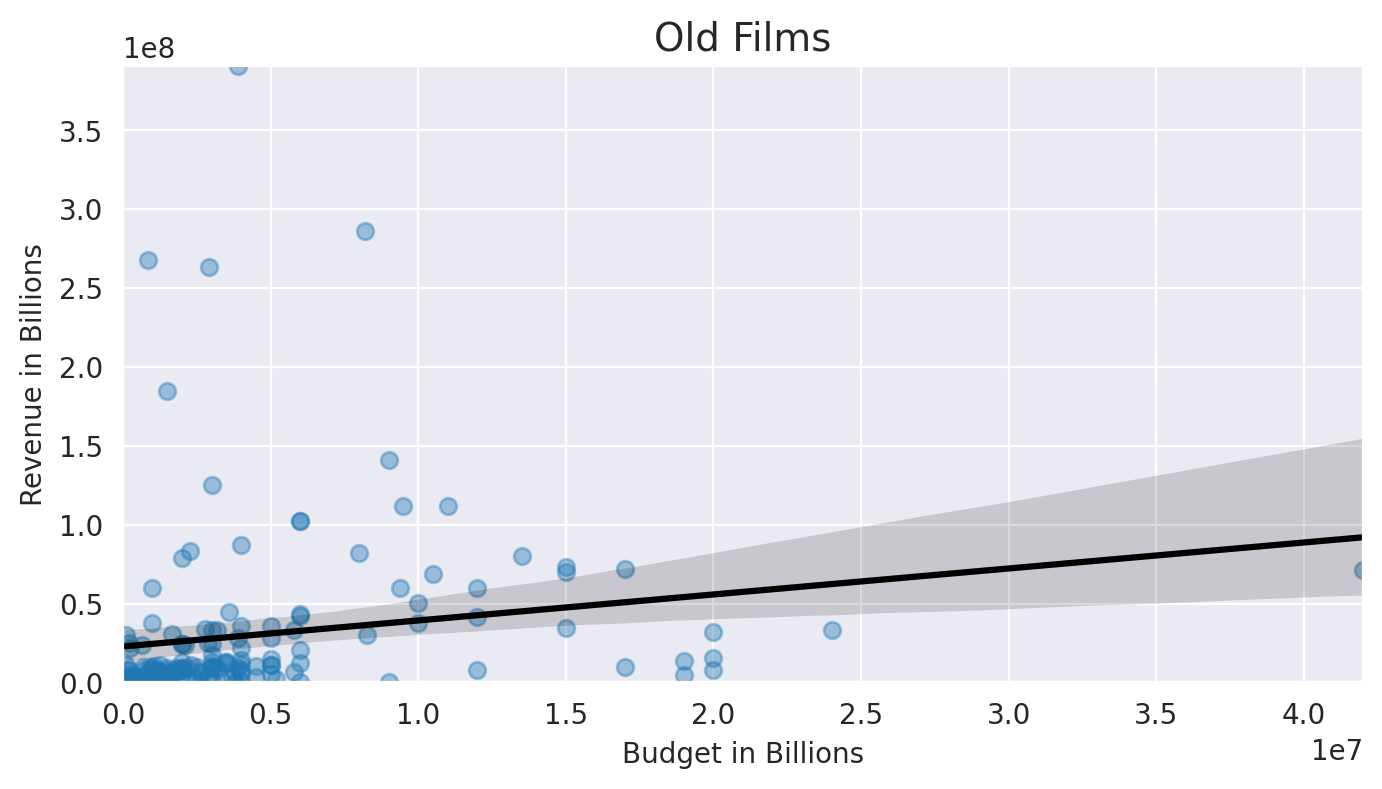

In [67]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=old_films, 
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                     scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
    
    ax.set(ylim=(0, old_films.USD_Worldwide_Gross.max()),
           xlim=(0,old_films.USD_Production_Budget.max()),
           xlabel='Budget in Billions',
           ylabel='Revenue in Billions')
    ax.set_title("Old Films", fontsize=14)

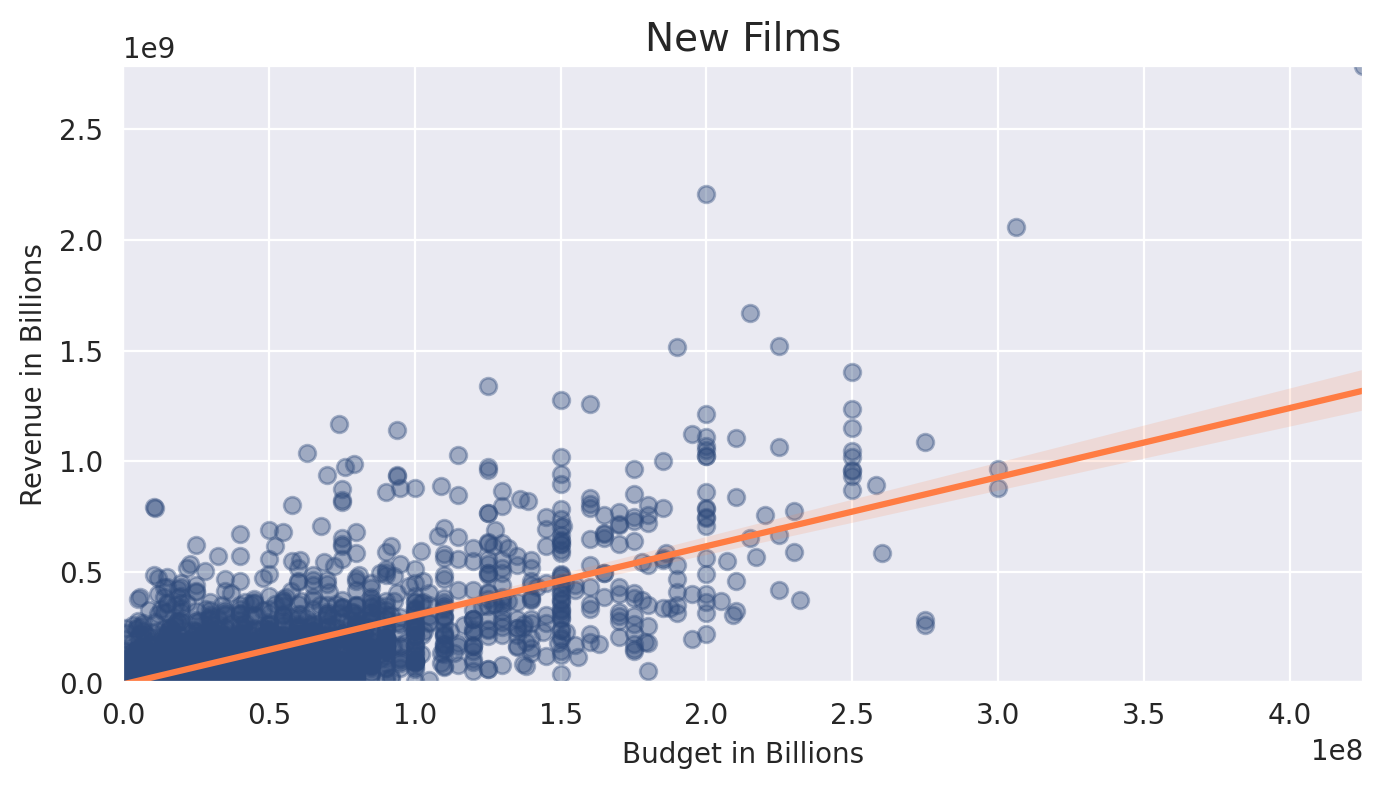

In [71]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, 
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                     scatter_kws = {'alpha': 0.4, 'color' : '#2f4b7c'},
            line_kws = {'color': '#ff7c43'})
    
    ax.set(ylim=(0, new_films.USD_Worldwide_Gross.max()),
           xlim=(0,new_films.USD_Production_Budget.max()),
           xlabel='Budget in Billions',
           ylabel='Revenue in Billions')
    ax.set_title("New Films", fontsize=14)

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [72]:
from sklearn.linear_model import LinearRegression

In [75]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

Our `LinearRegression` does not like receiving Pandas Series (e.g., `new_films.USD_Production_Budget`), so I've created some new DataFrames here.

In [76]:
#Now it's time to get to work and run the calculations:

# Find the best-fit line
regression.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [80]:
 # Theta 0
regression.intercept_

array([-8650768.00661027])

In [79]:
# Theta 1
regression.coef_

array([[3.12259592]])

###  R-Squared: Goodness of Fit

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [81]:
regression.score(X, y)


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [82]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [83]:
regression.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [84]:
regression.intercept_

array([22821538.63508039])

In [85]:
regression.coef_

array([[1.64771314]])

In [86]:
regression.score(X,y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 